#Answer Part (a)

In [ ]:
import numpy as np

# Define the objective function
def f(x):
    x1, x2 = x
    return x1**2 + 4*x1*x2 + 1600*x2**2

# Define the gradient of the objective function
def gradient_f(x):
    x1, x2 = x
    df_dx1 = 2*x1 + 4*x2
    df_dx2 = 4*x1 + 3200*x2
    return np.array([df_dx1, df_dx2])

# Define the Hessian matrix of the objective function
def hessian_f(x):
    x1, x2 = x
    d2f_dx1dx1 = 2
    d2f_dx1dx2 = 4
    d2f_dx2dx1 = 4
    d2f_dx2dx2 = 3200
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]])

# Initial guess
x0 = np.array([0.0, 0.0])

# Minimize the objective function using the inverse of the Hessian matrix
hessian_inv = np.linalg.inv(hessian_f(x0))
minimizer = x0 - np.dot(hessian_inv, gradient_f(x0))

# Calculate minimum value
min_value = f(minimizer)

# Calculate the condition number of the Hessian matrix
condition_number = np.linalg.cond(hessian_f(x0))

# Print results
print("Minimizer:", minimizer)
print("Minimum Value:", min_value)
print("Hessian Matrix:")
print(hessian_f(x0))
print("Condition Number:", condition_number)

Minimizer: [0. 0.]
Minimum Value: 0.0
Hessian Matrix:
[[   2    4]
 [   4 3200]]
Condition Number: 1604.0150407248495


#Answer (b)
**Justification for Symmetry and Positive Definiteness of  $D$**

The matrix $D$ is defined as $D = MM^T$, where $M$ is an invertible matrix. Let's denote $M^{-1}$ as $N$ (i.e., $M^{-1} = N$). Then,

$D = MM^T = MN$

Now, let's consider the transpose of $D^T$:

$D^T = (MN)^T = N^T M^T$

Since $M$ is an invertible matrix, its transpose is also invertible, and $N^T$ is the inverse of $M^T$. Therefore, $D^T$ is also invertible.

Since $D$ is both invertible and $D^T$ is invertible, $D$ is symmetric.

Now, let's consider a vector $v$, $v^T D v$. Since $D$ is symmetric, $v^T D v$ is always real, and $D$ is positive definite if $v^T D v > 0$ for all non-zero vectors $v$.

Thus, $D$ is symmetric and positive definite.

**{Matrix } $Q${in the New Gradient Scheme with Scaling:**

In the new gradient scheme with scaling, the update is given by $x_{k+1} = x_k - \eta D \nabla f(x_k)$. Here, $D$ is a diagonal matrix that scales the gradient.

The matrix $Q$ whose condition number needs to be analyzed in this scheme is $Q = D^{-1}$, which is the inverse of the scaling matrix $D$. The condition number of $Q$ will influence the convergence behavior of the optimization algorithm. If $Q$ has a large condition number, it indicates ill-conditioning and might lead to slow convergence. The choice of the scaling matrix $D$ is crucial in mitigating ill-conditioning and improving the convergence rate.


#Answer (c)

In [ ]:
import numpy as np
import pandas as pd

def f(x):
    return x[0]**2 + 4 * x[0] * x[1] + 1600 * x[1]**2

def gradient_f(x):
    return np.array([2 * x[0] + 4 * x[1], 4 * x[0] + 3200 * x[1]])

def backtracking_line_search(x, direction, alpha0, rho, gamma):
    alpha = alpha0
    while f(x + alpha * direction) > f(x) + gamma * alpha * np.dot(gradient_f(x), direction):
        alpha *= rho
    return alpha

def gradient_descent_with_scaling(x0, tolerance, alpha, rho, gamma):
    x = x0.copy()
    k = 0

    while np.linalg.norm(gradient_f(x)) > tolerance:
        pk = -gradient_f(x)
        Dk = np.eye(len(x))  # Identity matrix for scaling

        alpha_k = backtracking_line_search(x, pk, alpha, rho, gamma)
        x = x + alpha_k * np.dot(Dk, pk)
        k += 1

    return x, f(x), k

# Set parameters for backtracking line search
alpha = 1
gamma = 0.5
rhos = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Set starting point and tolerance
x0 = np.array([1, 4000])
tolerance = 1e-12

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Rho', 'Minimizer', 'Objective Function Value', 'Iterations'])
iter2=[]

for rho in rhos:
    result, obj_func_value, iterations = gradient_descent_with_scaling(x0, tolerance, alpha, rho, gamma)
    iter2.append(iterations)

    # Append results to DataFrame
    results_df = results_df.append({
        'Rho': rho,
        'Minimizer': result,
        'Objective Function Value': obj_func_value,
        'Iterations': iterations
    }, ignore_index=True)

# Display the results
print(results_df)


<ipython-input-11-8de59de3bbe0>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-11-8de59de3bbe0>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-11-8de59de3bbe0>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-11-8de59de3bbe0>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-11-8de59de3bbe0>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

    Rho                                         Minimizer  \
0  0.90   [-4.868971540211662e-13, 5.565782985266135e-16]   
1  0.80   [-4.790069246205774e-13, 5.778598470150959e-16]   
2  0.75  [-4.1234555262442357e-13, 4.986931462532005e-16]   
3  0.60   [-4.868091530113097e-13, 6.523302867086069e-16]   
4  0.50   [-4.770387496332369e-13, 6.862543844823448e-16]   
5  0.40   [-4.920160157725997e-13, 6.639161644357058e-16]   
6  0.25   [-4.789524215025443e-13, 5.090807270080365e-16]   
7  0.10   [-4.442505893300768e-13, 6.836703789033225e-16]   
8  0.01   [-4.876545546312649e-13, 5.391056716414657e-16]   

   Objective Function Value Iterations  
0              2.364805e-25       3583  
1              2.288747e-25       1331  
2              1.696042e-25        538  
3              2.363938e-25       5615  
4              2.270100e-25      16981  
5              2.414784e-25       5961  
6              2.288348e-25      15287  
7              1.968916e-25      37849  
8              2.372

<ipython-input-11-8de59de3bbe0>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
def gradient_descent_without_scaling(x0, tolerance, alpha, rho, gamma):
    x = x0.copy()
    k = 0

    while np.linalg.norm(gradient_f(x)) > tolerance:
        pk = -gradient_f(x)

        alpha_k = backtracking_line_search(x, pk, alpha, rho, gamma)
        x = x + alpha_k * pk
        k += 1

    return x, f(x), k

# Initialize a DataFrame to store results for gradient descent without scaling
results_df_no_scaling = pd.DataFrame(columns=['Rho1', 'Minimizer1', 'Objective Function Value1', 'Iterations1'])
iter=[]

for rho in rhos:
    result, obj_func_value, iterations = gradient_descent_without_scaling(x0, tolerance, alpha, rho, gamma)
    iter.append(iterations)

    # Append results to DataFrame
    results_df_no_scaling = results_df_no_scaling.append({
        'Rho1': rho,
        'Minimizer1': result,
        'Objective Function Value1': obj_func_value,
        'Iterations1': iterations
    }, ignore_index=True)

# Display the results for gradient descent without scaling
print(results_df_no_scaling)


<ipython-input-12-a2714ad9133a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_no_scaling = results_df_no_scaling.append({
<ipython-input-12-a2714ad9133a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_no_scaling = results_df_no_scaling.append({
<ipython-input-12-a2714ad9133a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_no_scaling = results_df_no_scaling.append({
<ipython-input-12-a2714ad9133a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_no_scaling = results_df_no_scaling.append({
<ipython-input-12-a2714ad9133a>:23: FutureWarning: The frame.append method is deprecated and wil

   Rho1                                        Minimizer1  \
0  0.90   [-4.868971540211662e-13, 5.565782985266135e-16]   
1  0.80   [-4.790069246205774e-13, 5.778598470150959e-16]   
2  0.75  [-4.1234555262442357e-13, 4.986931462532005e-16]   
3  0.60   [-4.868091530113097e-13, 6.523302867086069e-16]   
4  0.50   [-4.770387496332369e-13, 6.862543844823448e-16]   
5  0.40   [-4.920160157725997e-13, 6.639161644357058e-16]   
6  0.25   [-4.789524215025443e-13, 5.090807270080365e-16]   
7  0.10   [-4.442505893300768e-13, 6.836703789033225e-16]   
8  0.01   [-4.876545546312649e-13, 5.391056716414657e-16]   

   Objective Function Value1 Iterations1  
0               2.364805e-25        3583  
1               2.288747e-25        1331  
2               1.696042e-25         538  
3               2.363938e-25        5615  
4               2.270100e-25       16981  
5               2.414784e-25        5961  
6               2.288348e-25       15287  
7               1.968916e-25       37849  
8 

<ipython-input-12-a2714ad9133a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_no_scaling = results_df_no_scaling.append({


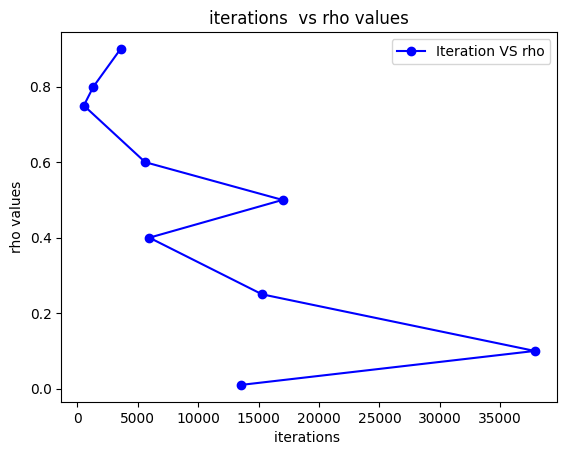

In [ ]:
# preparing a plot of iterations vs rho values
import matplotlib.pyplot as plt

# Example lists
list1 = iter
list2 = rhos

# Plotting
plt.plot(list1, list2, marker='o', linestyle='-', color='b', label='Iteration VS rho')

# Adding labels and title
plt.xlabel('iterations ')
plt.ylabel('rho values')
plt.title('iterations  vs rho values')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


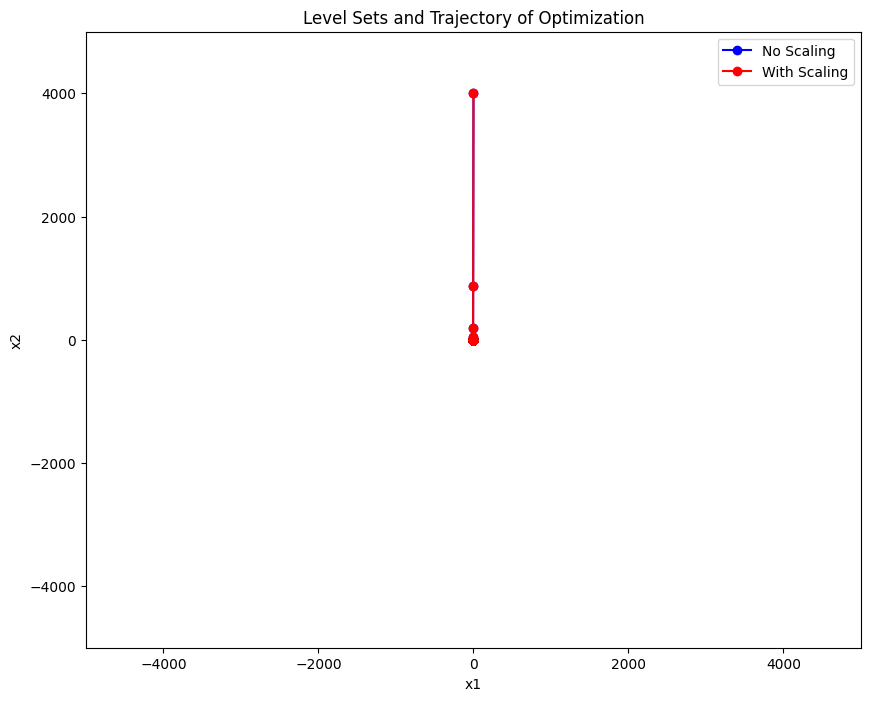

In [ ]:
# plotting the level plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Define the function
def f(x):
    return x[0]**2 + 4 * x[0] * x[1] + 1600 * x[1]**2

# Define the gradient of the function
def gradient_f(x):
    return np.array([2 * x[0] + 4 * x[1], 4 * x[0] + 3200 * x[1]])

# Gradient descent without scaling
def gradient_descent_no_scaling1(x0, alpha, rho, gamma, tolerance=1e-12):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_f(x)) > tolerance:
        pk = -gradient_f(x)

        alpha_k = backtracking_line_search(x, pk, alpha, rho, gamma)
        x = x + alpha_k * pk

        trajectory.append(x.copy())

    return np.array(trajectory)

# Gradient descent with scaling
def gradient_descent_with_scaling1(x0, alpha, rho, gamma, tolerance=1e-12):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_f(x)) > tolerance:
        pk = -gradient_f(x)
        Dk = np.eye(len(x))

        alpha_k = backtracking_line_search(x, pk, alpha, rho, gamma)
        x = x + alpha_k * np.dot(Dk, pk)

        trajectory.append(x.copy())

    return np.array(trajectory)

# Set parameters for both gradient descent algorithms
alpha = 1
rho = 0.5
gamma = 0.5

# Set starting point
x0 = np.array([1, 4000])

# Perform gradient descent with and without scaling
trajectory_no_scaling = gradient_descent_no_scaling1(x0, alpha, rho, gamma)
trajectory_with_scaling = gradient_descent_with_scaling1(x0, alpha, rho, gamma)

# Plot the level sets
x_vals = np.linspace(-5000, 5000, 400)
y_vals = np.linspace(-5000, 5000, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

# Plot the trajectory without scaling
plt.plot(trajectory_no_scaling[:, 0], trajectory_no_scaling[:, 1], marker='o', linestyle='-', color='b', label='No Scaling')

# Plot the trajectory with scaling
plt.plot(trajectory_with_scaling[:, 0], trajectory_with_scaling[:, 1], marker='o', linestyle='-', color='r', label='With Scaling')

# Adding labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Trajectory of Optimization')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
